<a href="https://colab.research.google.com/github/Kamalraj18/fruit-and-vegetable-classification-using-Deep-learning-CNN-/blob/main/Fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mkdir set

In [ ]:
cp  /content/drive/MyDrive/dataset/fruit-and-vegetable-image-recognition.zip set

In [ ]:
cd set

/content/set


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
val_path="/content/set/validation"
train_path="/content/set/train"
test_path="/content/set/test"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [ ]:
class_names = train_dataset.class_names
print(len(class_names))

36


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))


In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping( monitor='val_accuracy', patience=5)]
history = model.fit(x=train_dataset,
                    epochs= 50,
                    callbacks=callbacks,
                    validation_data=val_dataset)

Epoch 1/50
98/98 [==============================] - 74s 581ms/step - loss: 3.0488 - accuracy: 0.1721 - val_loss: 2.5264 - val_accuracy: 0.2650
Epoch 2/50
98/98 [==============================] - 61s 588ms/step - loss: 2.1894 - accuracy: 0.3605 - val_loss: 2.0462 - val_accuracy: 0.4160
Epoch 3/50
98/98 [==============================] - 60s 574ms/step - loss: 1.8274 - accuracy: 0.4504 - val_loss: 1.7760 - val_accuracy: 0.4843
Epoch 4/50
98/98 [==============================] - 61s 583ms/step - loss: 1.6157 - accuracy: 0.5101 - val_loss: 1.1694 - val_accuracy: 0.6439
Epoch 5/50
98/98 [==============================] - 61s 582ms/step - loss: 1.3454 - accuracy: 0.6006 - val_loss: 1.1655 - val_accuracy: 0.6581
Epoch 6/50
98/98 [==============================] - 60s 579ms/step - loss: 1.1463 - accuracy: 0.6437 - val_loss: 0.6288 - val_accuracy: 0.8177
Epoch 7/50
98/98 [==============================] - 61s 587ms/step - loss: 0.9955 - accuracy: 0.6957 - val_loss: 0.8284 - val_accuracy: 0.7664

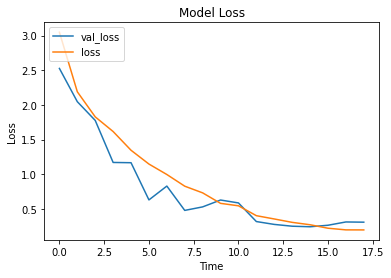

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

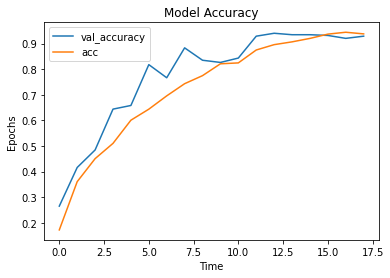

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

In [ ]:
from keras_preprocessing import image
def getr(poth):
  image_path=poth
  img = image.load_img(image_path, target_size=(224,224,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=32)
  label = np.argmax(pred, axis=1)
  
  print("Predicted: "+class_names[np.argmax(pred)])
  plt.imshow(img)
  plt.show()

Predicted: capsicum


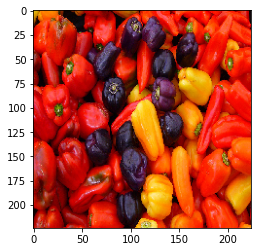

In [ ]:
getr("/content/set/test/capsicum/Image_3.JPG")